### 畳み込みニューラルネットワーク (Convolutional Neural Networks)
https://www.tensorflow.org/tutorials/images/cnn?hl=ja

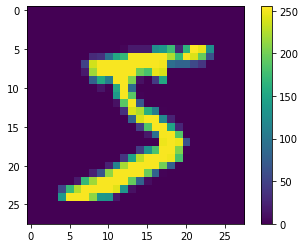

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

In [46]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# (レコード数, 縦, 横)
# (60000, 28, 28) (60000,)
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# 画像をフルカラーで確認
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# (レコード数, 縦, 横, カラーチャネル)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
# スケール正規化 (256色を0~1の範囲にする)
train_images, test_images = train_images / 255.0, test_images / 255.0

# モデル構築
model = models.Sequential()

# 畳み込みレイヤー
#   shape (height, width, channels) 出力
#   出力チャネル数は引数によって決まる(32or64)
#   ネットワークが深くなるにつれて縮小する傾向がる
#   というのが、※1と※2のshapeが違う理由だがなぜだ。
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # ※1
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # ※2

# 分類レイヤー
model.add(layers.Flatten()) # shape (3, 3, 64) の3Dテンソルを1Dテンソルに変換。3 * 3 * 64 = 576
model.add(layers.Dense(64, activation='relu')) # Denseは1D(ベクトル)を入力にもつ。576 => 64
model.add(layers.Dense(10, activation='softmax')) # yのクラス数に合わせる 64 => 10

# モデルの詳細表示
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epoch = 5
# validも渡すにはミニバッチを自前で作って validation_data,validation_steps を指定するっぽい
history = model.fit(train_images, train_labels, epochs=epoch)

313/313 - 1s - loss: 0.0376 - accuracy: 0.9877
0.9876999855041504


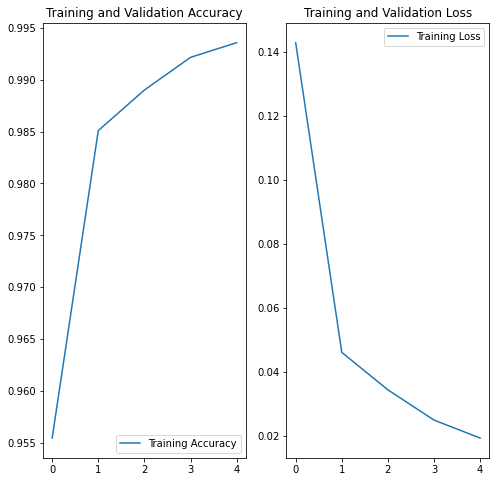

In [45]:
# 評価
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

# loss, accuracy 可視化
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()